<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/4_8_ESAA_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. 앙상블 학습 개요

앙상블 학습의 유형 : 보팅, 배깅, 부스팅, 스태깅

1) 보팅 : 서로 다른 알고리즘을 가진 분류기를 결합

: 선형회귀, KNN, 서포트벡터머신이라는 3개의 ML알고리즘이 같은 데이터 세트 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측결과 선정

2) 배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게
-> 랜덤포레스트

: 단일 ML 알고리즘(결정트리)으로 여러 분류기가 학습으로 개별 예측, 학습하는 데이터 세트가 보팅방식과는 다름. 개별 분류기에 할당된 학습 데이터는 원본 학습데이터를 샘플링해 추출(부트스트레핑)

3) 부스팅 : 여러개의 분류기가 순차적으로 학습 수행, 앞서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기에 가중치 부스팅,

-> 그래디언트 부스트, XGBoost, LightGBM

4) 스태깅 : 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 메타모델로 재학습시켜 결과를 예측

### 1. 보팅 유형 - 하드보팅과 소프트 보팅

1) 하드 보팅 : 다수결 원칙과 유사. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정.

2) `소프트 보팅` : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정 -> 대체로 소프트 보팅 사용

### 2. 보팅 분류기 (Voting Classifier)


In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
#로지스틱 회귀와 KNN을 기반으로 한 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


## 2. 랜덤포레스트(배깅)

: 배깅은 앞선 보팅과는 다르게 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

In [7]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#중복된 피처명에 대해 새로운 피처명 부과
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

def get_human_datasets( ):
  #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용,신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  #학습 피터 데이터세트와 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  #로드된 학습/테스트용 DataFrame을 모두 변환
  return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_human_datasets()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤포레스트 정확도 : 0.9253


## 5. GBM

: 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습. 예측하면서 잘못 예측한 데이터에 가중치 부여를 통헤 오류 개선헤나가며 학습하는 방식

: AdaBoost, 그래디언트 부스트

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings

X_train, X_test, y_train, y_test = get_human_datasets()

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print("GBM 수행시간 : {0:.4f}초".format(time.time()-start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [0.05, 0.1]}

grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## 6. XGBoost



In [4]:
import xgboost
print(xgboost.__version__)

2.0.3


### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [5]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                                  test_size = 0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [18]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [14]:
params = { 'max_depth':3, 'eta': 0.1,
          'objective': 'binary:logistic',
           'eval_metric': 'logloss',
           'early_stoppings':100}

num_rounds = 400


In [21]:
eval_list = [(dtrain,'train'),(dtest,'test')]

xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.58431	test-logloss:0.56554
[1]	train-logloss:0.51885	test-logloss:0.50669
[2]	train-logloss:0.46457	test-logloss:0.45868
[3]	train-logloss:0.41713	test-logloss:0.41822
[4]	train-logloss:0.37585	test-logloss:0.38103
[5]	train-logloss:0.34075	test-logloss:0.35137
[6]	train-logloss:0.31028	test-logloss:0.32588
[7]	train-logloss:0.28283	test-logloss:0.30127
[8]	train-logloss:0.25925	test-logloss:0.28197
[9]	train-logloss:0.23822	test-logloss:0.26265
[10]	train-logloss:0.21951	test-logloss:0.24821
[11]	train-logloss:0.20251	test-logloss:0.23231
[12]	train-logloss:0.18759	test-logloss:0.22079
[13]	train-logloss:0.17386	test-logloss:0.20795
[14]	train-logloss:0.16199	test-logloss:0.19764
[15]	train-logloss:0.15109	test-logloss:0.18950
[16]	train-logloss:0.14056	test-logloss:0.18052
[17]	train-logloss:0.13137	test-logloss:0.17246
[18]	train-logloss:0.12329	test-logloss:0.16512
[19]	train-logloss:0.11565	test-logloss:0.15828
[20]	train-logloss:0.10860	test-logloss:0.15436
[2

In [22]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.879 0.004 0.908 0.288 0.99  1.    0.999 0.999 0.993 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:

get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9947


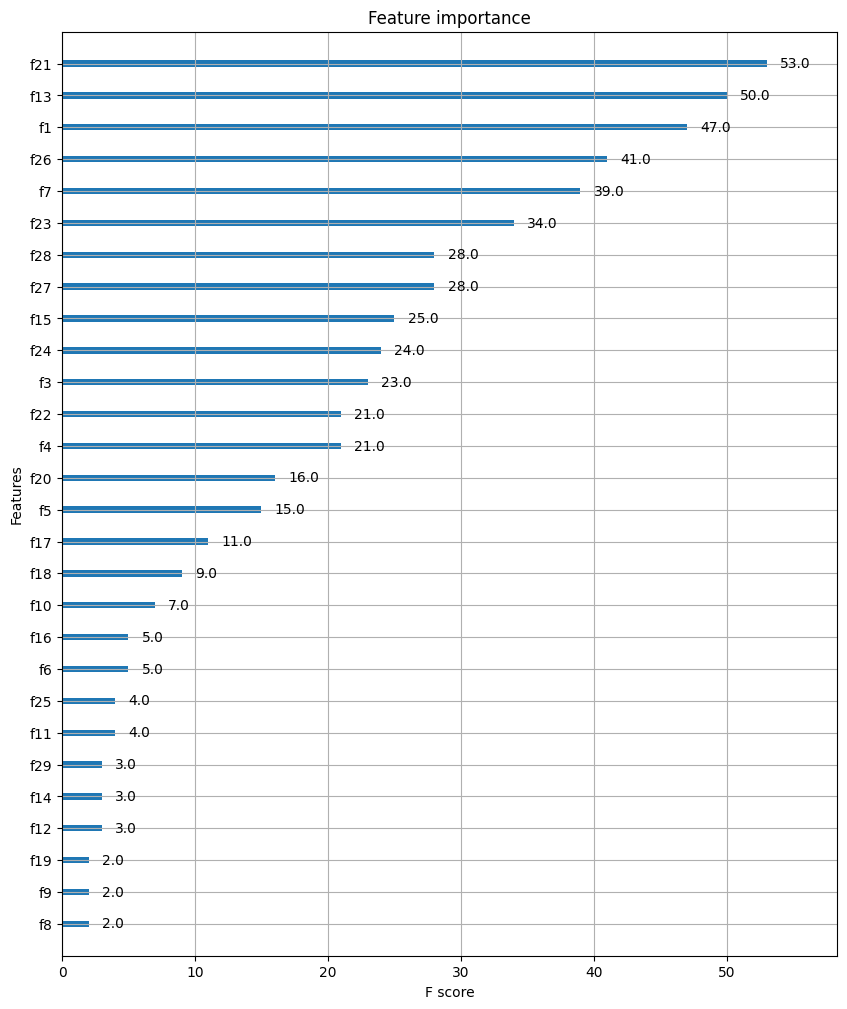

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

In [26]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [27]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9947


In [28]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [29]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9951


In [30]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

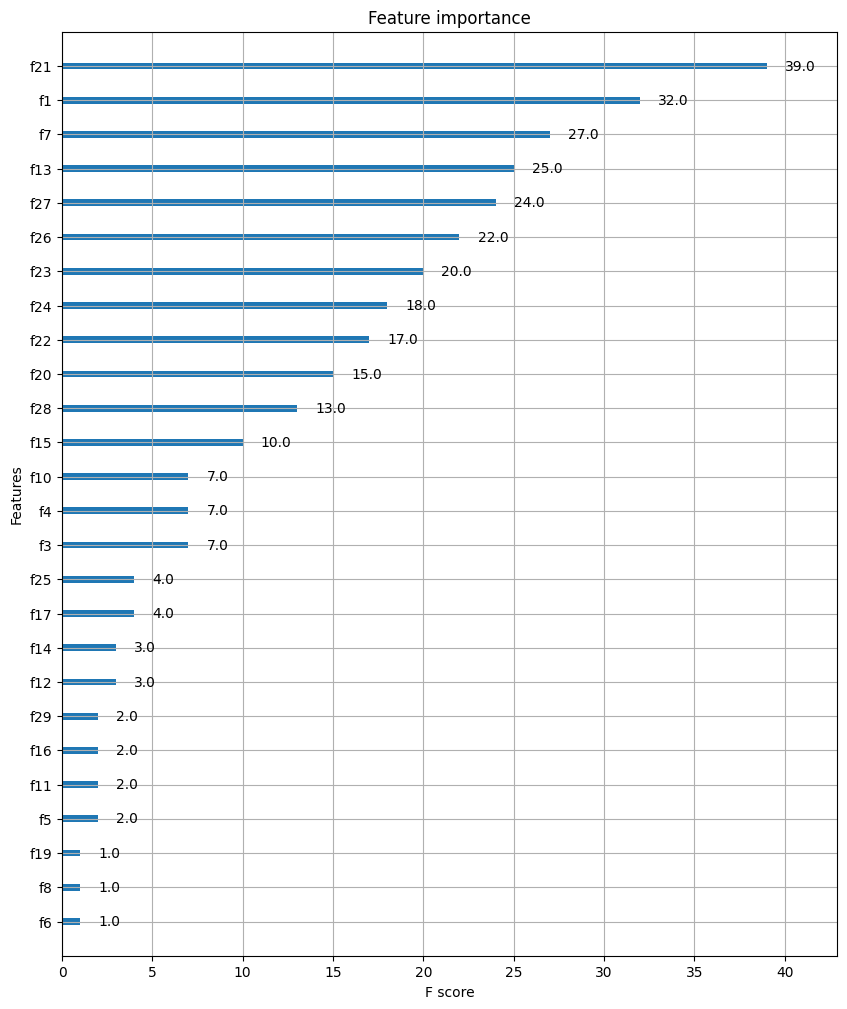

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)